In [1]:
import pandas as pd #importing the library pandas to clean the dataframe

In [2]:
df = pd.read_csv("Survey1.csv") #importing survey 1

In [3]:
df.head(5)

,Zeitstempel,Dein Alter,Dein Wohnort,"Die Sprachen, die Du bevorzugst zu sprechen",Welche Plattform bevorzugst Du für die Kommunikation mit anderen?,Deine Top 3 Games (1/3),Deine Top 3 Games (2/3),Deine Top 3 Games (3/3),Wie lange spielst Du in einer Woche (im Durchschnitt)?,Wie schätz Du dich beim zocken ein?,Deine Freizeitaktivitäten sind.. (1/3),Deine Freizeitaktivitäten sind.. (2/3),Deine Freizeitaktivitäten sind.. (3/3)
0,2021/10/02 12:39:19 PM MEZ,23,Mannheim,Deutsch,Discord,Grand Theft Auto (GTA) Online,Call of Duty (COD),Fortnite,Weniger als 10 Stunden,6,Verreisen,Essen (Foodie),mit Freunden ausgehen
1,2021/10/02 12:45:05 PM MEZ,24,Stuttgart,Deutsch,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,FIFA,10 - 15 Stunden,5,mit Freunden ausgehen,Animes schauen,Sport
2,2021/10/02 12:49:30 PM MEZ,27,Mannheim,Englisch,Discord,Grand Theft Auto (GTA) Online,Fortnite,Andere Spiele,Weniger als 10 Stunden,5,Netflix schauen,Essen (Foodie),mit Freunden ausgehen
3,2021/10/02 1:03:58 PM MEZ,29,Neuhausen,Deutsch,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,Andere Spiele,Weniger als 10 Stunden,2,Verreisen,Essen (Foodie),mit Freunden ausgehen
4,2021/10/02 1:27:54 PM MEZ,20,Stuttgart,Deutsch,PS Party,Grand Theft Auto (GTA) Online,Call of Duty (COD),Rocket league,Weniger als 10 Stunden,8,Animes schauen,Sport,Essen (Foodie)


## Data Preprocessing

In [4]:
# check data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Zeitstempel                                                        45 non-null     object
 1   Dein Alter                                                         45 non-null     int64 
 2   Dein Wohnort                                                       45 non-null     object
 3   Die Sprachen, die Du bevorzugst zu sprechen                        44 non-null     object
 4   Welche Plattform bevorzugst Du für die Kommunikation mit anderen?  45 non-null     object
 5   Deine Top 3 Games (1/3)                                            45 non-null     object
 6   Deine Top 3 Games (2/3)                                            45 non-null     object
 7   Deine Top 3 Games (3/3)              

In total we have 45 entries

### First step: check the age range

The first step is to check the values. Since the target group is adressed to gamers in the age range of 18 - 35, gamers which are younger than 18 and older than 36 cannot be included and will be removed.

<AxesSubplot:>

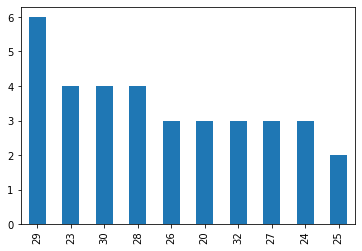

In [5]:
df['Dein Alter'].value_counts().head(10).plot.bar()

### Second step: drop null cells

The second step is to drop null cells. Therefore first it will be analyzed whether there are null cells and if so, they will be excluded.

In [6]:
# check "?" Question mark in dataset
df.isin(['?']).any()

Zeitstempel                                                          False
Dein Alter                                                           False
Dein Wohnort                                                         False
Die Sprachen, die Du bevorzugst zu sprechen                          False
Welche Plattform bevorzugst Du für die Kommunikation mit anderen?    False
Deine Top 3 Games (1/3)                                              False
Deine Top 3 Games (2/3)                                              False
Deine Top 3 Games (3/3)                                              False
Wie lange spielst Du in einer Woche (im Durchschnitt)?               False
Wie schätz Du dich beim zocken ein?                                  False
Deine Freizeitaktivitäten sind.. (1/3)                               False
Deine Freizeitaktivitäten sind.. (2/3)                               False
Deine Freizeitaktivitäten sind.. (3/3)                               False
dtype: bool

In [7]:
# Check null values in dataset
df.isin(['nan']).any()

Zeitstempel                                                          False
Dein Alter                                                           False
Dein Wohnort                                                         False
Die Sprachen, die Du bevorzugst zu sprechen                          False
Welche Plattform bevorzugst Du für die Kommunikation mit anderen?    False
Deine Top 3 Games (1/3)                                              False
Deine Top 3 Games (2/3)                                              False
Deine Top 3 Games (3/3)                                              False
Wie lange spielst Du in einer Woche (im Durchschnitt)?               False
Wie schätz Du dich beim zocken ein?                                  False
Deine Freizeitaktivitäten sind.. (1/3)                               False
Deine Freizeitaktivitäten sind.. (2/3)                               False
Deine Freizeitaktivitäten sind.. (3/3)                               False
dtype: bool

Null cell is identified:

In [8]:
# checking the null values
df.isnull().sum()

Zeitstempel                                                          0
Dein Alter                                                           0
Dein Wohnort                                                         0
Die Sprachen, die Du bevorzugst zu sprechen                          1
Welche Plattform bevorzugst Du für die Kommunikation mit anderen?    0
Deine Top 3 Games (1/3)                                              0
Deine Top 3 Games (2/3)                                              0
Deine Top 3 Games (3/3)                                              0
Wie lange spielst Du in einer Woche (im Durchschnitt)?               0
Wie schätz Du dich beim zocken ein?                                  0
Deine Freizeitaktivitäten sind.. (1/3)                               0
Deine Freizeitaktivitäten sind.. (2/3)                               0
Deine Freizeitaktivitäten sind.. (3/3)                               0
dtype: int64

Null cell is deleted:

In [9]:
# droping the null value
df.dropna(inplace=True)

In [10]:
# check datatypes whether the one null value was deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 44
Data columns (total 13 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Zeitstempel                                                        44 non-null     object
 1   Dein Alter                                                         44 non-null     int64 
 2   Dein Wohnort                                                       44 non-null     object
 3   Die Sprachen, die Du bevorzugst zu sprechen                        44 non-null     object
 4   Welche Plattform bevorzugst Du für die Kommunikation mit anderen?  44 non-null     object
 5   Deine Top 3 Games (1/3)                                            44 non-null     object
 6   Deine Top 3 Games (2/3)                                            44 non-null     object
 7   Deine Top 3 Games (3/3)              

After deleting the null cell, there are 44 entries in the dataframe.

### Third Step: Deleting "Zeitstempel" (Timestamp)

GoogleForms collected the timestamp when users answered the survey. This information is not necessary for this research thats why this column will be deleted.

In [11]:
# drop 'Zeitstempel' (english: Timestamp)
df.drop('Zeitstempel', axis=1, inplace=True)
df.head()

,Dein Alter,Dein Wohnort,"Die Sprachen, die Du bevorzugst zu sprechen",Welche Plattform bevorzugst Du für die Kommunikation mit anderen?,Deine Top 3 Games (1/3),Deine Top 3 Games (2/3),Deine Top 3 Games (3/3),Wie lange spielst Du in einer Woche (im Durchschnitt)?,Wie schätz Du dich beim zocken ein?,Deine Freizeitaktivitäten sind.. (1/3),Deine Freizeitaktivitäten sind.. (2/3),Deine Freizeitaktivitäten sind.. (3/3)
0,23,Mannheim,Deutsch,Discord,Grand Theft Auto (GTA) Online,Call of Duty (COD),Fortnite,Weniger als 10 Stunden,6,Verreisen,Essen (Foodie),mit Freunden ausgehen
1,24,Stuttgart,Deutsch,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,FIFA,10 - 15 Stunden,5,mit Freunden ausgehen,Animes schauen,Sport
2,27,Mannheim,Englisch,Discord,Grand Theft Auto (GTA) Online,Fortnite,Andere Spiele,Weniger als 10 Stunden,5,Netflix schauen,Essen (Foodie),mit Freunden ausgehen
3,29,Neuhausen,Deutsch,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,Andere Spiele,Weniger als 10 Stunden,2,Verreisen,Essen (Foodie),mit Freunden ausgehen
4,20,Stuttgart,Deutsch,PS Party,Grand Theft Auto (GTA) Online,Call of Duty (COD),Rocket league,Weniger als 10 Stunden,8,Animes schauen,Sport,Essen (Foodie)


### Fourth step: Translating into English

Thereby, the values of the columns will be translated

#### Translating the language the user prefers to speak

First checking which values are available:

<AxesSubplot:>

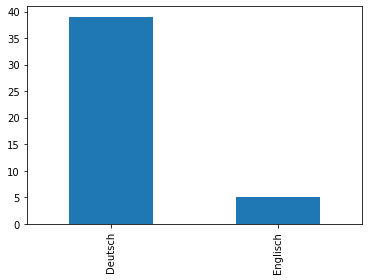

In [12]:
# plot the languages 
df['Die Sprachen, die Du bevorzugst zu sprechen'].value_counts().head(10).plot.bar()

Afterwards translating the languages

In [13]:
df.loc[df['Die Sprachen, die Du bevorzugst zu sprechen'].str.contains('De'), 'Die Sprachen, die Du bevorzugst zu sprechen'] = 'German'
df.loc[df['Die Sprachen, die Du bevorzugst zu sprechen'].str.contains('En'), 'Die Sprachen, die Du bevorzugst zu sprechen'] = 'English'

#### Translating the communication platform

First checking which values exist

<AxesSubplot:>

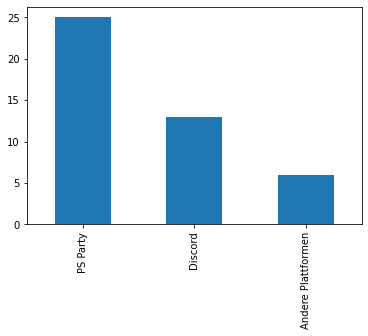

In [14]:
# plot the languages 
df['Welche Plattform bevorzugst Du für die Kommunikation mit anderen?'].value_counts().head(10).plot.bar()

Afterwards translating:

In [15]:
df.loc[df['Welche Plattform bevorzugst Du für die Kommunikation mit anderen?'].str.contains('Andere Plattformen'), 'Welche Plattform bevorzugst Du für die Kommunikation mit anderen?'] = 'Other Platforms'

#### Translating the games

In this case also the values are analyzed

<AxesSubplot:>

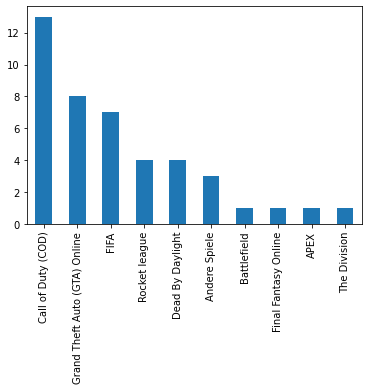

In [16]:
# plot the games (1/3)
df['Deine Top 3 Games (1/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

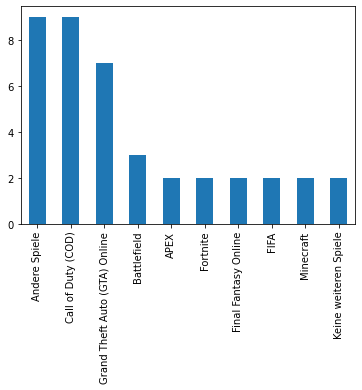

In [17]:
# plot the games (2/3)
df['Deine Top 3 Games (2/3)'].value_counts().head(10).plot.bar()

<AxesSubplot:>

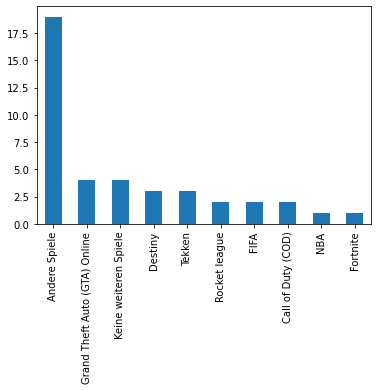

In [18]:
# plot the games (3/3)
df['Deine Top 3 Games (3/3)'].value_counts().head(10).plot.bar()

Thereby, are two values which have to be translated. It "Andere Spiele" which means "other games". And "Keine weiteren Spiele" which means "No additional games"

In [19]:
#converting "Andere Spiele" into "Other Games"
df.loc[df['Deine Top 3 Games (1/3)'].str.contains('Andere Spiele'), 'Deine Top 3 Games (1/3)'] = 'Other Games'
df.loc[df['Deine Top 3 Games (2/3)'].str.contains('Andere Spiele'), 'Deine Top 3 Games (2/3)'] = 'Other Games'
df.loc[df['Deine Top 3 Games (3/3)'].str.contains('Andere Spiele'), 'Deine Top 3 Games (3/3)'] = 'Other Games'

In [20]:
#converting "Keine weiteren Spiele" into "No other games"

df.loc[df['Deine Top 3 Games (2/3)'].str.contains('Keine weiteren Spiele'), 'Deine Top 3 Games (2/3)'] = 'No additional games'
df.loc[df['Deine Top 3 Games (3/3)'].str.contains('Keine weiteren Spiele'), 'Deine Top 3 Games (3/3)'] = 'No additional games'

#### Translating how long the gamer plays in a week (in average)

Also in this case, the values are first analyzed

<AxesSubplot:>

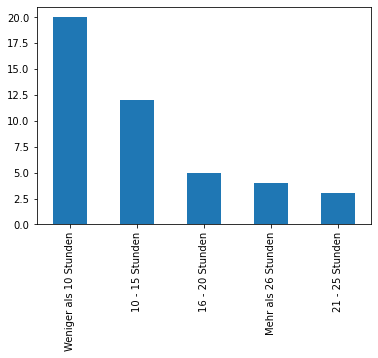

In [21]:
# plot the values 
df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].value_counts().head(10).plot.bar()

And afterwards translated:

In [22]:
#Translating the values in English
df.loc[df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].str.contains('Weniger als 10 Stunden'), 'Wie lange spielst Du in einer Woche (im Durchschnitt)?'] = 'Less than 10 hours'
df.loc[df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].str.contains('10 - 15 Stunden'), 'Wie lange spielst Du in einer Woche (im Durchschnitt)?'] = '10 - 15 hours'
df.loc[df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].str.contains('16 - 20 Stunden'), 'Wie lange spielst Du in einer Woche (im Durchschnitt)?'] = '16 - 20 hours'
df.loc[df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].str.contains('21 - 25 Stunden'), 'Wie lange spielst Du in einer Woche (im Durchschnitt)?'] = '21 - 25 hours'
df.loc[df['Wie lange spielst Du in einer Woche (im Durchschnitt)?'].str.contains('Mehr als 26 Stunden'), 'Wie lange spielst Du in einer Woche (im Durchschnitt)?'] = 'More than 26 hours'


#### Translating the hobbies

Finally the hobbies are translated

##### Hobbies (1/3)

<AxesSubplot:>

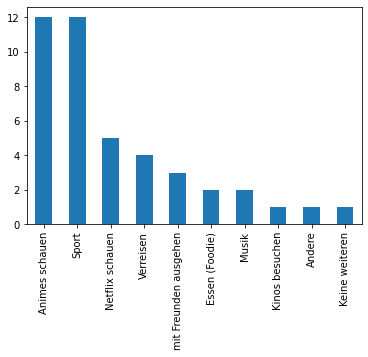

In [23]:
# plot the languages 
df['Deine Freizeitaktivitäten sind.. (1/3)'].value_counts().head(10).plot.bar()

In [24]:
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Animes schauen'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Watching Animes'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Verreisen'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Travelling'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Netflix'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Watching Netflix'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Freunden'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Going out with Friends'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Musik'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Music'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Kinos'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Going to the cinemas'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Essen'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Foodie'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Keine'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Nothing at all'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Andere'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Others'
df.loc[df['Deine Freizeitaktivitäten sind.. (1/3)'].str.contains('Lesen'), 'Deine Freizeitaktivitäten sind.. (1/3)'] = 'Reading'

##### Hobbies (2/3)

In [25]:
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Animes schauen'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Watching Animes'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Verreisen'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Travelling'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Netflix'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Watching Netflix'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Freunden'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Going out with Friends'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Musik'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Music'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Kinos'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Going to the cinemas'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Essen'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Foodie'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Keine'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Nothing at all'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Andere'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Others'
df.loc[df['Deine Freizeitaktivitäten sind.. (2/3)'].str.contains('Lesen'), 'Deine Freizeitaktivitäten sind.. (2/3)'] = 'Reading'

##### Hobbies (3/3)

In [26]:
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Animes schauen'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Watching Animes'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Verreisen'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Travelling'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Netflix'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Watching Netflix'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Freunden'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Going out with Friends'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Musik'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Music'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Lesen'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Reading'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Kinos'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Going to the cinemas'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Essen'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Foodie'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Keine'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Nothing at all'
df.loc[df['Deine Freizeitaktivitäten sind.. (3/3)'].str.contains('Andere'), 'Deine Freizeitaktivitäten sind.. (3/3)'] = 'Others'

#### Translating the head of the columns

In [27]:
df.columns = ["Your Age", "Your Location", "Languages you prefer to speak", "Platform to communicate", "Top 3 Games (1/3)", "Top 3 Games (2/3)", "Top 3 Games (3/3)", "How long do you play", "Your Gaming Performance", "Hobbies (1/3)", "Hobbies (2/3)", "Hobbies (3/3)"]

Ét voila: the whole dataframe is translated

In [28]:
df.head()

,Your Age,Your Location,Languages you prefer to speak,Platform to communicate,Top 3 Games (1/3),Top 3 Games (2/3),Top 3 Games (3/3),How long do you play,Your Gaming Performance,Hobbies (1/3),Hobbies (2/3),Hobbies (3/3)
0,23,Mannheim,German,Discord,Grand Theft Auto (GTA) Online,Call of Duty (COD),Fortnite,Less than 10 hours,6,Travelling,Foodie,Going out with Friends
1,24,Stuttgart,German,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,FIFA,10 - 15 hours,5,Going out with Friends,Watching Animes,Sport
2,27,Mannheim,English,Discord,Grand Theft Auto (GTA) Online,Fortnite,Other Games,Less than 10 hours,5,Watching Netflix,Foodie,Going out with Friends
3,29,Neuhausen,German,PS Party,Call of Duty (COD),Grand Theft Auto (GTA) Online,Other Games,Less than 10 hours,2,Travelling,Foodie,Going out with Friends
4,20,Stuttgart,German,PS Party,Grand Theft Auto (GTA) Online,Call of Duty (COD),Rocket league,Less than 10 hours,8,Watching Animes,Sport,Foodie


Saving the csv file to apply the algorithm K-Means clustering in a seperate notebook

In [29]:
# this is the first dataset obtained from the 3 surveys and prepared for being merged with its mentor chilean pair.
df.to_csv('MatchingGamers_Finale.csv')